# * Kurapati Venkatesh

# * 09012021

# * Topic: Forecasting – Time Series  ✨🚀

# ---------------------------------------------------------------------------

## Problem Statement:

## The dataset consists of monthly totals of international airline passengers, from 1995 to 2002.Main aim is to predict number of passengers for next five years by using time series forecasting and prepare a document for each model explaining how many dummy variables you have created and RMSE value for each model.

## -----------------------------------------------------------------------------------

### Problem Objective:
##### To prepare a prediction model  - To predict number of passengers for next five years by using time series forecasting and prepare a document for each model explaining how many dummy variables have created and RMSE value for each model.

## -------------------------------------------------------------------------------------------

## import libraries:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm
import warnings

## import dataset:

In [2]:
passengers = pd.read_excel(r"G:\360digit\assignments meterial\forecasting\Airlines Data.xlsx")

In [3]:
passengers.head()

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121


#### Converting the 'Month' column into proper date time format:

In [4]:
dates = pd.date_range(start='1995-01-01', freq='MS',periods=len(passengers))

In [5]:
dates

DatetimeIndex(['1995-01-01', '1995-02-01', '1995-03-01', '1995-04-01',
               '1995-05-01', '1995-06-01', '1995-07-01', '1995-08-01',
               '1995-09-01', '1995-10-01', '1995-11-01', '1995-12-01',
               '1996-01-01', '1996-02-01', '1996-03-01', '1996-04-01',
               '1996-05-01', '1996-06-01', '1996-07-01', '1996-08-01',
               '1996-09-01', '1996-10-01', '1996-11-01', '1996-12-01',
               '1997-01-01', '1997-02-01', '1997-03-01', '1997-04-01',
               '1997-05-01', '1997-06-01', '1997-07-01', '1997-08-01',
               '1997-09-01', '1997-10-01', '1997-11-01', '1997-12-01',
               '1998-01-01', '1998-02-01', '1998-03-01', '1998-04-01',
               '1998-05-01', '1998-06-01', '1998-07-01', '1998-08-01',
               '1998-09-01', '1998-10-01', '1998-11-01', '1998-12-01',
               '1999-01-01', '1999-02-01', '1999-03-01', '1999-04-01',
               '1999-05-01', '1999-06-01', '1999-07-01', '1999-08-01',
      

In [6]:
passengers['Month'] = dates.month
passengers['Year'] = dates.year

In [7]:
passengers.head()

,Month,Passengers,Year
0,1,112,1995
1,2,118,1995
2,3,132,1995
3,4,129,1995
4,5,121,1995


#### To get the names of the month:

In [8]:
passengers.dtypes

Month         int64
Passengers    int64
Year          int64
dtype: object

In [9]:
passengers.head()

,Month,Passengers,Year
0,1,112,1995
1,2,118,1995
2,3,132,1995
3,4,129,1995
4,5,121,1995


In [10]:
import calendar
passengers['Month'] = passengers['Month'].apply(lambda x: calendar.month_abbr[x])
passengers.rename({'#Passengers':'Passengers'},axis=1,inplace=True)
passengers = passengers[['Month','Year','Passengers']]

In [11]:
passengers.head()

,Month,Year,Passengers
0,Jan,1995,112
1,Feb,1995,118
2,Mar,1995,132
3,Apr,1995,129
4,May,1995,121


In [12]:
passengers['Date'] = dates
passengers.set_index('Date',inplace=True)

In [13]:
passengers.head()

,Month,Year,Passengers
Date,,,
1995-01-01,Jan,1995,112
1995-02-01,Feb,1995,118
1995-03-01,Mar,1995,132
1995-04-01,Apr,1995,129
1995-05-01,May,1995,121


## Exploratory Data Analysis:

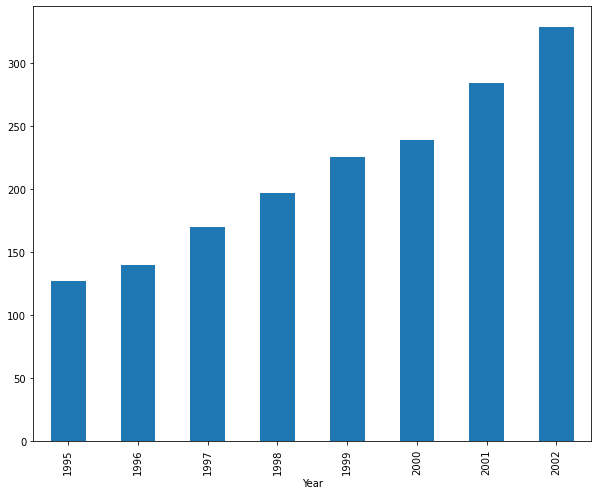

In [14]:
plt.figure(figsize=(10,8))
passengers.groupby('Year')['Passengers'].mean().plot(kind='bar')
plt.show()

From the above figure we can see that passengers are increasing with the increase in the year

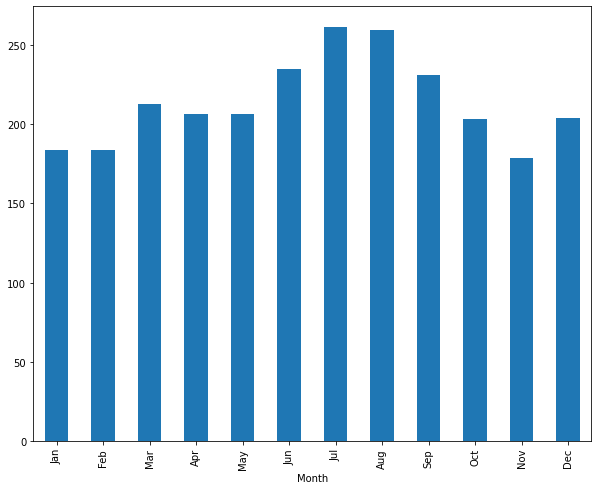

In [16]:
plt.figure(figsize=(10,8))
passengers.groupby('Month')['Passengers'].mean().reindex(index=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']).plot(kind='bar')
plt.show()

From the above figure we can see that more passengers can be seen between months June to September.

##### Lets plot the data to see the trend and seasonality

In [17]:
passengers_count = passengers['Passengers']

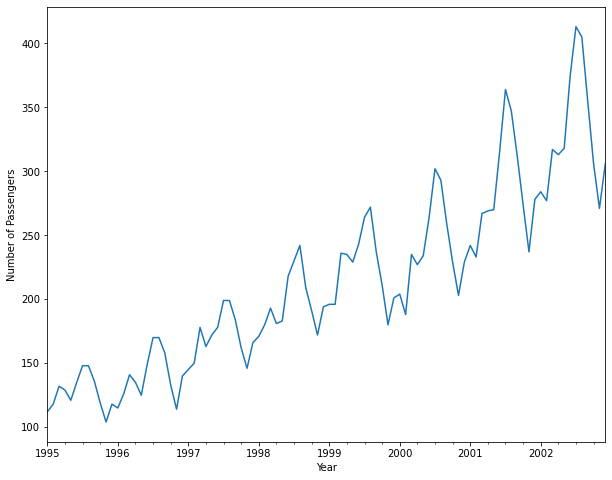

In [18]:
plt.figure(figsize=(10,8))
passengers_count.plot()
plt.xlabel('Year')
plt.ylabel('Number of Passengers')
plt.show()

###### Now we start with time series decomposition of this data to understand underlying patterns such as trend, seasonality, cycle and irregular remainder

In [19]:
decompose = sm.tsa.seasonal_decompose(passengers_count,model='multiplicative',extrapolate_trend=8)

Text(0.5, 0.98, 'Decomposition of Time Series')

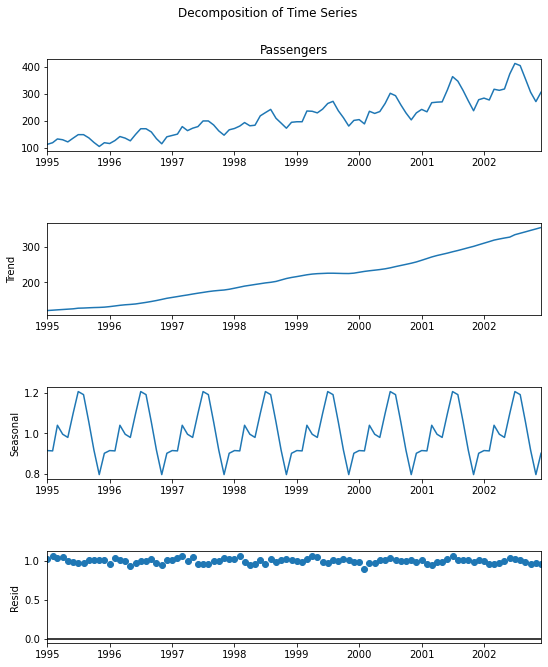

In [20]:
fig = decompose.plot()
fig.set_figheight(10)
fig.set_figwidth(8)
fig.suptitle('Decomposition of Time Series')

### Trend:

##### Time Series Decomposition: 
- To begin with let's try to decipher trends embedded in the above tractor sales time series. It is clearly evident that there is an overall increasing trend in the data along with some seasonal variations. However, it might not always be possible to make such visual inferences.


So, more formally, we can check stationarity using the following: Plotting Rolling Statistics: We can plot the moving average or moving variance and see if it varies with time. By moving average/variance we mean that at any instant 't', we'll take the average/variance of the last year, i.e. last 12 months. But again this is more of a visual technique.
Now, let’s try to remove wrinkles from our time series using moving average. We will take moving average of different time periods i.e. 4,6,8, and 12 months as shown below. Here, moving average is shown in orange and actual series in blue.

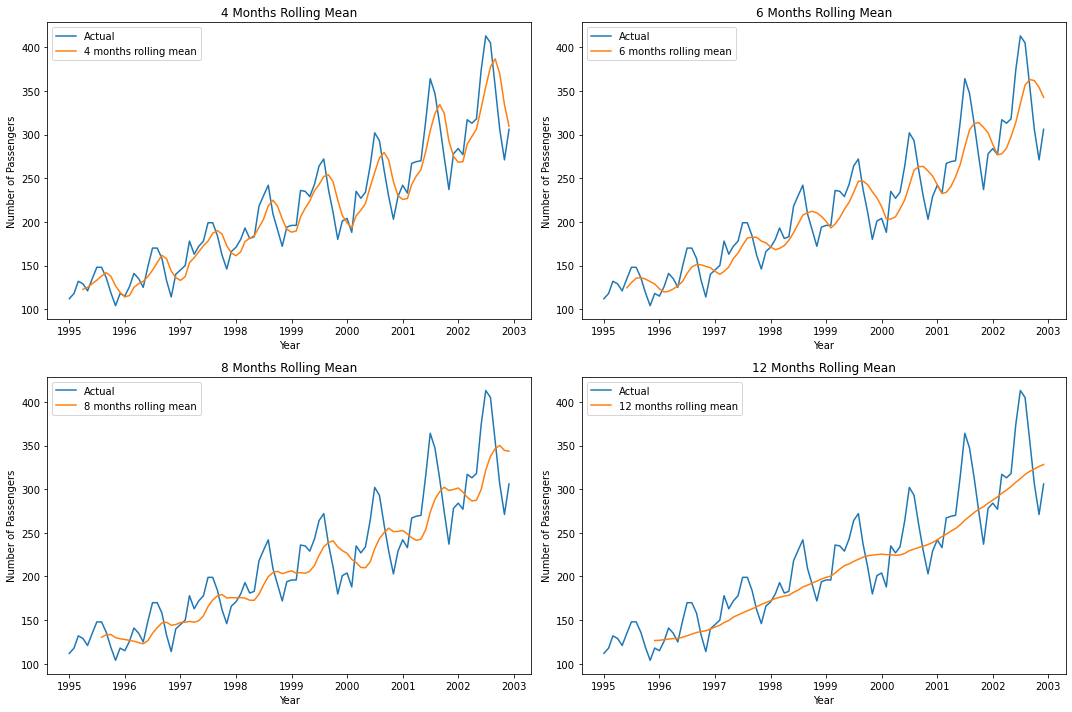

In [22]:
fig,axes = plt.subplots(2,2)
fig.set_figheight(10)
fig.set_figwidth(15)
axes[0][0].plot(passengers.index,passengers_count,label='Actual')
axes[0][0].plot(passengers.index,passengers_count.rolling(window=4).mean(),label='4 months rolling mean')
axes[0][0].set_xlabel('Year')
axes[0][0].set_ylabel('Number of Passengers')
axes[0][0].set_title('4 Months Rolling Mean')
axes[0][0].legend(loc='best')


axes[0][1].plot(passengers.index,passengers_count,label='Actual')
axes[0][1].plot(passengers.index,passengers_count.rolling(window=6).mean(),label='6 months rolling mean')
axes[0][1].set_xlabel('Year')
axes[0][1].set_ylabel('Number of Passengers')
axes[0][1].set_title('6 Months Rolling Mean')
axes[0][1].legend(loc='best')



axes[1][0].plot(passengers.index,passengers_count,label='Actual')
axes[1][0].plot(passengers.index,passengers_count.rolling(window=8).mean(),label='8 months rolling mean')
axes[1][0].set_xlabel('Year')
axes[1][0].set_ylabel('Number of Passengers')
axes[1][0].set_title('8 Months Rolling Mean')
axes[1][0].legend(loc='best')


axes[1][1].plot(passengers.index,passengers_count,label='Actual')
axes[1][1].plot(passengers.index,passengers_count.rolling(window=12).mean(),label='12 months rolling mean')
axes[1][1].set_xlabel('Year')
axes[1][1].set_ylabel('Number of Passengers')
axes[1][1].set_title('12 Months Rolling Mean')
axes[1][1].legend(loc='best')

plt.tight_layout()
plt.show()

As we could see in the above plots, 12-month moving average could produce a wrinkle free curve as desired. This on some level is expected since we are using month-wise data for our analysis and there is expected monthly-seasonal effect in our data.

### Seasonality:

Let us see how many passengers travelled in flights on a month on month basis. We will plot a stacked annual plot to observe seasonality in our data.

In [23]:
passengers.head()

,Month,Year,Passengers
Date,,,
1995-01-01,Jan,1995,112
1995-02-01,Feb,1995,118
1995-03-01,Mar,1995,132
1995-04-01,Apr,1995,129
1995-05-01,May,1995,121


In [24]:
monthly = pd.pivot_table(data=passengers,values='Passengers',index='Month',columns='Year')
monthly = monthly.reindex(index=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])

In [25]:
monthly

Year,1995,1996,1997,1998,1999,2000,2001,2002
Month,,,,,,,,
Jan,112,115,145,171,196,204,242,284
Feb,118,126,150,180,196,188,233,277
Mar,132,141,178,193,236,235,267,317
Apr,129,135,163,181,235,227,269,313
May,121,125,172,183,229,234,270,318
Jun,135,149,178,218,243,264,315,374
Jul,148,170,199,230,264,302,364,413
Aug,148,170,199,242,272,293,347,405
Sep,136,158,184,209,237,259,312,355


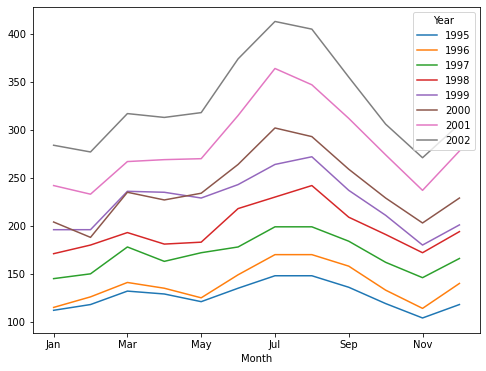

In [26]:
monthly.plot(figsize=(8,6))
plt.show()

In [27]:
yearly = pd.pivot_table(data=passengers,values='Passengers',index='Year',columns='Month')
yearly = yearly[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']]

In [28]:
yearly

Month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
Year,,,,,,,,,,,,
1995,112,118,132,129,121,135,148,148,136,119,104,118
1996,115,126,141,135,125,149,170,170,158,133,114,140
1997,145,150,178,163,172,178,199,199,184,162,146,166
1998,171,180,193,181,183,218,230,242,209,191,172,194
1999,196,196,236,235,229,243,264,272,237,211,180,201
2000,204,188,235,227,234,264,302,293,259,229,203,229
2001,242,233,267,269,270,315,364,347,312,274,237,278
2002,284,277,317,313,318,374,413,405,355,306,271,306


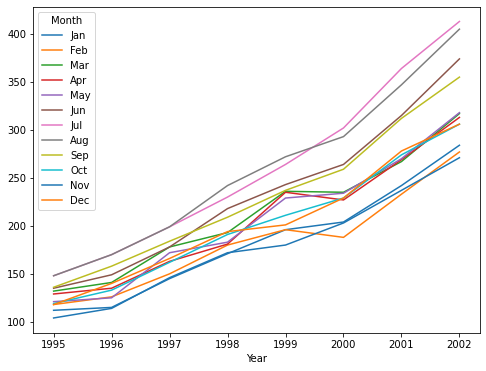

In [29]:
yearly.plot(figsize=(8,6))
plt.show()

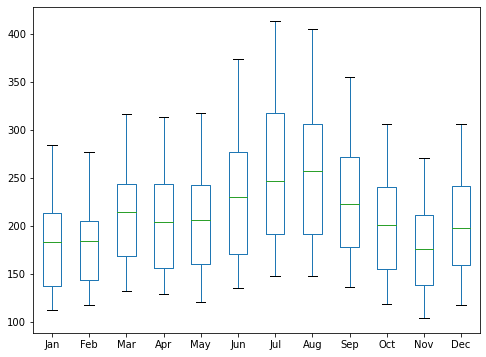

In [30]:
yearly.plot(kind='box',figsize=(8,6))
plt.show()

## Important Inferences:

- The passengers are increasing without fail every year.


- July and August are the peak months for passengers.


- We can see a seasonal cycle of 12 months where the mean value of each month starts with a increasing trend in the beginning of the year and drops down towards the end of the year. We can see a seasonal effect with a cycle of 12 months.

# Forecasting Models:

## ARIMA Modelling:

###### Dickey-Fuller Test: 

The most important assumption of auto regressive method is that the TS data should be stationary.

Let's run the Dicky Fuller Test on the timeseries and verify the null hypothesis that the TS is non-stationary.

In [34]:
# Perform Dickey-Fuller test:
from statsmodels.tsa.stattools import adfuller
adfuller(passengers_count)

(1.3402479596467032,
 0.9968250481137263,
 12,
 83,
 {'1%': -3.5117123057187376,
  '5%': -2.8970475206326833,
  '10%': -2.5857126912469153},
 626.0084713813505)

In [35]:
adfuller_results = pd.Series(adfuller(passengers_count)[:4],index=['T stats','p-value','lags used','Number of observations'])
for key,value in adfuller(passengers_count)[4].items():
    adfuller_results['Critical Value'+' '+ key] = value
print(adfuller_results)

T stats                    1.340248
p-value                    0.996825
lags used                 12.000000
Number of observations    83.000000
Critical Value 1%         -3.511712
Critical Value 5%         -2.897048
Critical Value 10%        -2.585713
dtype: float64


The p-value is greater than 0.05 (Coinfidence Interval 95%).

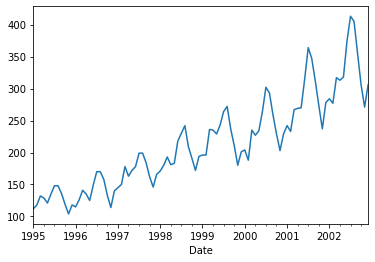

In [37]:
passengers_count.plot()
plt.show()

Let's do log transformation to convert the TS to stationary TS

In [38]:
passengers_log = np.log10(passengers_count)

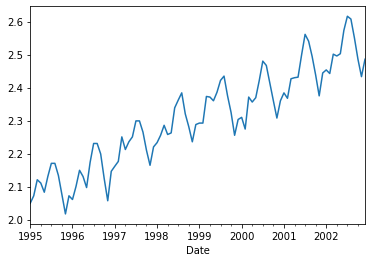

In [39]:
passengers_log.plot()
plt.show()

In [40]:
# Perform Dickey-Fuller test:
from statsmodels.tsa.stattools import adfuller
adfuller(passengers_log)
adfuller_results = pd.Series(adfuller(passengers_log)[:4],index=['T stats','p-value','lags used','Number of observations'])
for key,value in adfuller(passengers_log)[4].items():
    adfuller_results['Critical Value (%s)'%key] = value
print(adfuller_results)

T stats                   -0.723027
p-value                    0.840695
lags used                 12.000000
Number of observations    83.000000
Critical Value (1%)       -3.511712
Critical Value (5%)       -2.897048
Critical Value (10%)      -2.585713
dtype: float64


The p-value is still greater than 0.05 (Coinfidence Interval 95%).
The log transformation has made variance stationary but mean is still increasing.
Let's try differencing by 1.

In [41]:
diff1 = passengers_count.diff(1)
diff1.head()

Date
1995-01-01     NaN
1995-02-01     6.0
1995-03-01    14.0
1995-04-01    -3.0
1995-05-01    -8.0
Name: Passengers, dtype: float64

In [42]:
diff1.dropna(axis=0,inplace=True)

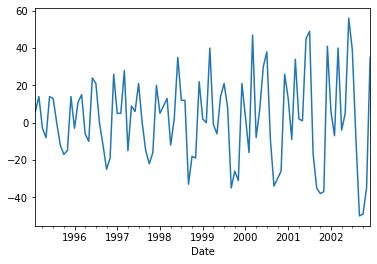

In [43]:
diff1.plot()
plt.show()

In [44]:
# Perform Dickey-Fuller test:
from statsmodels.tsa.stattools import adfuller
adfuller(diff1)
adfuller_results = pd.Series(adfuller(diff1)[:4],index=['T stats','p-value','lags used','Number of observations'])
for key,value in adfuller(diff1)[4].items():
    adfuller_results['Critical Value (%s)'%key] = value
print(adfuller_results)

T stats                   -2.150002
p-value                    0.224889
lags used                 12.000000
Number of observations    82.000000
Critical Value (1%)       -3.512738
Critical Value (5%)       -2.897490
Critical Value (10%)      -2.585949
dtype: float64


The p-value is still greater than 0.05 (Coinfidence Interval 95%).
The differencing by 1 has made mean stationary but variance is changing.
Let's try differencing by 1 on the log transformation.

In [45]:
log_diff1 = passengers_log.diff(1)
log_diff1.head()

Date
1995-01-01         NaN
1995-02-01    0.022664
1995-03-01    0.048692
1995-04-01   -0.009984
1995-05-01   -0.027804
Name: Passengers, dtype: float64

In [46]:
log_diff1.dropna(axis=0,inplace=True)

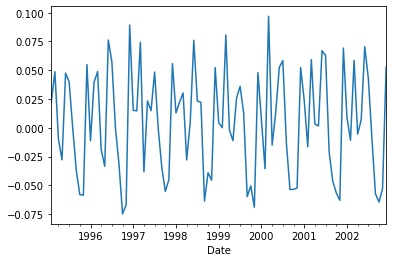

In [47]:
log_diff1.plot()
plt.show()

In [48]:
# Perform Dickey-Fuller test:
from statsmodels.tsa.stattools import adfuller
adfuller(log_diff1)
adfuller_results = pd.Series(adfuller(log_diff1)[:4],index=['T stats','p-value','lags used','Number of observations'])
for key,value in adfuller(log_diff1)[4].items():
    adfuller_results['Critical Value (%s)'%key] = value
print(adfuller_results)

T stats                   -2.670823
p-value                    0.079225
lags used                 12.000000
Number of observations    82.000000
Critical Value (1%)       -3.512738
Critical Value (5%)       -2.897490
Critical Value (10%)      -2.585949
dtype: float64


In [49]:
log_diff2 = passengers_log.diff(2)
log_diff2.head()

Date
1995-01-01         NaN
1995-02-01         NaN
1995-03-01    0.071356
1995-04-01    0.038708
1995-05-01   -0.037789
Name: Passengers, dtype: float64

In [50]:
log_diff2.dropna(axis=0,inplace=True)

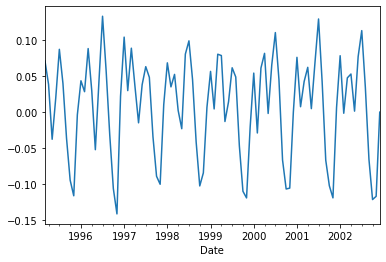

In [51]:
log_diff2.plot()
plt.show()

In [52]:
# Perform Dickey-Fuller test:
from statsmodels.tsa.stattools import adfuller
adfuller(log_diff2)
adfuller_results = pd.Series(adfuller(log_diff2)[:4],index=['T stats','p-value','lags used','Number of observations'])
for key,value in adfuller(log_diff2)[4].items():
    adfuller_results['Critical Value (%s)'%key] = value
print(adfuller_results)

T stats                   -2.787629
p-value                    0.060063
lags used                 11.000000
Number of observations    82.000000
Critical Value (1%)       -3.512738
Critical Value (5%)       -2.897490
Critical Value (10%)      -2.585949
dtype: float64


p-value is less than 0.05. In this case we reject null hypothesis that TS is non stationary.

## ARIMA Modeling:

ARIMA is a combination of 3 parts i.e. AR (AutoRegressive), I (Integrated), and MA (Moving Average). A convenient notation for ARIMA model is ARIMA(p,d,q). Here p,d, and q are the levels for each of the AR, I, and MA parts. Each of these three parts is an effort to make the final residuals display a white noise pattern (or no pattern at all). In each step of ARIMA modeling, time series data is passed through these 3 parts like a sugar cane through a sugar cane juicer to produce juice-less residual. The sequence of three passes for ARIMA analysis is as following:

1st Pass of ARIMA to Extract Juice / Information Integrated (I) – subtract time series with its lagged series to extract trends from the data In this pass of ARIMA juicer, we extract trend(s) from the original time series data. Differencing is one of the most commonly used mechanisms for extraction of trends. Here, the original series is subtracted with it’s lagged series e.g. November’s sales values are subtracted with October’s values to produce trend-less residual series. The formulae for different orders of differencing are as follow:

- No Differencing (d=0) | Y′t=YtYt′=Yt
- 1st Differencing (d=1) | Y′t=Yt−Yt−1Yt′=Yt−Yt−1
- 2nd Differencing (d=1) | Y′t=Yt−Yt−1−(Yt−1−Yt−2)=Yt−2×Yt−1+Yt−2Yt′=Yt−Yt−1−(Yt−1−Yt−2)=Yt−2×Yt−1+Yt−2

#### Identification of best fit ARIMA model:

In order to fit the time series data with a seasonal ARIMA model, we need to first find the the values of ARIMA(p,d,q)(P,D,Q)s that optimize a metric of interest such as AIC or BIC. There are many guidelines and best practices to achieve this goal, yet the correct parametrization of ARIMA models can be a painstaking manual process that requires domain expertise and time. Auto arima function in forecast package in R helps us identify the best fit ARIMA model on the fly but in Python we will generate combination of p,d and q to select the optimal parameter values for our ARIMA(p,d,q)(P,D,Q)s time series model. This technique is known as "grid search" where we iteratively explore different combinations of parameters. For each such combination of parameters, we try to fit a new seasonal ARIMA model with the SARIMAX() function from the statsmodels module and assess AIC or BIC score. The model with the best score wins and the parmeters for that model are the optimal parmeters.

#### Iterate the process to find the best values for p, d, q and P, D, Q

In [54]:
import itertools
# Define the p, d and q parameters to take any value between 0 and 2
p = q = range(0, 3)
d = range(0,1)
# Generate all different combinations of p, d and q triplets
pdq = list(itertools.product(p, d, q))

In [55]:
pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 0, 2),
 (1, 0, 0),
 (1, 0, 1),
 (1, 0, 2),
 (2, 0, 0),
 (2, 0, 1),
 (2, 0, 2)]

In [56]:
# Generate all different combinations of seasonal p, q and q triplets
D = range(0,3)
P = Q = range(0, 3) 
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(P, D, Q))]

In [57]:
seasonal_pdq

[(0, 0, 0, 12),
 (0, 0, 1, 12),
 (0, 0, 2, 12),
 (0, 1, 0, 12),
 (0, 1, 1, 12),
 (0, 1, 2, 12),
 (0, 2, 0, 12),
 (0, 2, 1, 12),
 (0, 2, 2, 12),
 (1, 0, 0, 12),
 (1, 0, 1, 12),
 (1, 0, 2, 12),
 (1, 1, 0, 12),
 (1, 1, 1, 12),
 (1, 1, 2, 12),
 (1, 2, 0, 12),
 (1, 2, 1, 12),
 (1, 2, 2, 12),
 (2, 0, 0, 12),
 (2, 0, 1, 12),
 (2, 0, 2, 12),
 (2, 1, 0, 12),
 (2, 1, 1, 12),
 (2, 1, 2, 12),
 (2, 2, 0, 12),
 (2, 2, 1, 12),
 (2, 2, 2, 12)]

In [58]:
import sys
warnings.filterwarnings("ignore") # specify to ignore warning messages

best_aic = np.inf
best_pdq = None
best_seasonal_pdq = None
temp_model = None

for param in pdq:
    for param_seasonal in seasonal_pdq:
       
        try:
            temp_model = sm.tsa.statespace.SARIMAX(log_diff2,
                                             order = param,
                                             seasonal_order = param_seasonal,
                                             enforce_stationarity=False,
                                             enforce_invertibility=False)
            results = temp_model.fit()

           # print("SARIMAX{}x{}12 - AIC:{}".format(param, param_seasonal, results.aic))
            if results.aic < best_aic:
                best_aic = results.aic
                best_pdq = param
                best_seasonal_pdq = param_seasonal
        except:
            #print("Unexpected error:", sys.exc_info()[0])
            continue
print("Best SARIMAX{}x{}12 model - AIC:{}".format(best_pdq, best_seasonal_pdq, best_aic))

Best SARIMAX(1, 0, 1)x(1, 0, 1, 12)12 model - AIC:-401.1412636579777


Best SARIMAX(1, 0, 1)x(1, 0, 1, 12)12 model - AIC:-401.1412636579777 The best fit model is selected based on Akaike Information Criterion (AIC) , and Bayesian Information Criterion (BIC) values. The idea is to choose a model with minimum AIC and BIC values.

#### Predict sales on in-sample date using the best fit ARIMA model:

The next step is to predict passengers for in-sample data and find out how close is the model prediction on the in-sample data to the actual truth.

In [59]:
sarima = sm.tsa.statespace.SARIMAX(log_diff2,order=(1,0,1),seasonal_order=(1,0,1,12),enforce_invertibility=False,enforce_stationarity=False)

In [60]:
sarima_results = sarima.fit()

In [61]:
print(sarima_results.summary())

                                     SARIMAX Results                                      
Dep. Variable:                         Passengers   No. Observations:                   94
Model:             SARIMAX(1, 0, 1)x(1, 0, 1, 12)   Log Likelihood                 205.571
Date:                            Mon, 03 May 2021   AIC                           -401.141
Time:                                    16:55:07   BIC                           -389.231
Sample:                                03-01-1995   HQIC                          -396.366
                                     - 12-01-2002                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3146      0.118     -2.670      0.008      -0.546      -0.084
ma.L1          0.9998     23.486   

In [62]:
passengers_count.tail(15)

Date
2001-10-01    274
2001-11-01    237
2001-12-01    278
2002-01-01    284
2002-02-01    277
2002-03-01    317
2002-04-01    313
2002-05-01    318
2002-06-01    374
2002-07-01    413
2002-08-01    405
2002-09-01    355
2002-10-01    306
2002-11-01    271
2002-12-01    306
Name: Passengers, dtype: int64

In [66]:
prediction = sarima_results.get_prediction(start=pd.to_datetime('2002-01-01'),full_results=True)

In [67]:
prediction.predicted_mean

2002-01-01    0.080061
2002-02-01   -0.001536
2002-03-01    0.060676
2002-04-01    0.051030
2002-05-01   -0.002674
2002-06-01    0.057598
2002-07-01    0.119251
2002-08-01    0.037004
2002-09-01   -0.056039
2002-10-01   -0.109982
2002-11-01   -0.117694
2002-12-01    0.003462
Freq: MS, Name: predicted_mean, dtype: float64

In [68]:
predicted_values = np.power(10,prediction.predicted_mean)

In [69]:
predicted_values

2002-01-01    1.202434
2002-02-01    0.996470
2002-03-01    1.149941
2002-04-01    1.124681
2002-05-01    0.993861
2002-06-01    1.141822
2002-07-01    1.315984
2002-08-01    1.088940
2002-09-01    0.878944
2002-10-01    0.776279
2002-11-01    0.762616
2002-12-01    1.008004
Freq: MS, Name: predicted_mean, dtype: float64

In [71]:
actual = passengers_count['2002-01-01':]

In [72]:
actual

Date
2002-01-01    284
2002-02-01    277
2002-03-01    317
2002-04-01    313
2002-05-01    318
2002-06-01    374
2002-07-01    413
2002-08-01    405
2002-09-01    355
2002-10-01    306
2002-11-01    271
2002-12-01    306
Name: Passengers, dtype: int64

In [73]:
# mean absolute percentage error
mape = np.mean(np.abs(actual - predicted_values)/actual)
mape

0.9968144539130365

In [74]:
# mean square error
mse = np.mean((actual - predicted_values) ** 2)
mse

109161.28968776453

#### Forecast sales using the best fit ARIMA model:

The next step is to foercast passengers for next 3 years i.e. for 1961, 1962, and 1963 through the above model.

In [75]:
# Get forecast 36 steps (3 years) ahead in future
n_steps = 36
pred_uc_99 = sarima_results.get_forecast(steps=36, alpha=0.01) # alpha=0.01 signifies 99% confidence interval
pred_uc_95 = sarima_results.get_forecast(steps=36, alpha=0.05) # alpha=0.05 95% CI

# Get confidence intervals 95% & 99% of the forecasts
pred_ci_99 = pred_uc_99.conf_int()
pred_ci_95 = pred_uc_95.conf_int()

In [76]:
pred_ci_99.head()

,lower Passengers,upper Passengers
2003-01-01,0.034231,0.102556
2003-02-01,-0.038553,0.043524
2003-03-01,0.012605,0.095921
2003-04-01,0.015611,0.099038
2003-05-01,-0.045419,0.038014


In [77]:
pred_ci_95.head()

,lower Passengers,upper Passengers
2003-01-01,0.034231,0.102556
2003-02-01,-0.038553,0.043524
2003-03-01,0.012605,0.095921
2003-04-01,0.015611,0.099038
2003-05-01,-0.045419,0.038014


In [78]:
n_steps = 36
idx = pd.date_range(passengers_count.index[-1], periods=n_steps, freq='MS')
fc_95 = pd.DataFrame(np.column_stack([np.power(10, pred_uc_95.predicted_mean), np.power(10, pred_ci_95)]), 
                     index=idx, columns=['forecast', 'lower_ci_95', 'upper_ci_95'])
fc_99 = pd.DataFrame(np.column_stack([np.power(10, pred_ci_99)]), 
                     index=idx, columns=['lower_ci_99', 'upper_ci_99'])

In [79]:
fc_95.head()

,forecast,lower_ci_95,upper_ci_95
2002-12-01,1.170559,1.082008,1.266356
2003-01-01,1.005740,0.915054,1.105413
2003-02-01,1.133087,1.029450,1.247156
2003-03-01,1.141102,1.036600,1.256140
2003-04-01,0.991512,0.900702,1.091476


In [80]:
fc_99.head()

,lower_ci_99,upper_ci_99
2002-12-01,1.082008,1.266356
2003-01-01,0.915054,1.105413
2003-02-01,1.029450,1.247156
2003-03-01,1.036600,1.256140
2003-04-01,0.900702,1.091476


In [81]:
fc_all = fc_95.combine_first(fc_99)
fc_all = fc_all[['forecast', 'lower_ci_95', 'upper_ci_95', 'lower_ci_99', 'upper_ci_99']] # just reordering columns
fc_all.head()

,forecast,lower_ci_95,upper_ci_95,lower_ci_99,upper_ci_99
2002-12-01,1.170559,1.082008,1.266356,1.082008,1.266356
2003-01-01,1.005740,0.915054,1.105413,0.915054,1.105413
2003-02-01,1.133087,1.029450,1.247156,1.029450,1.247156
2003-03-01,1.141102,1.036600,1.256140,1.036600,1.256140
2003-04-01,0.991512,0.900702,1.091476,0.900702,1.091476


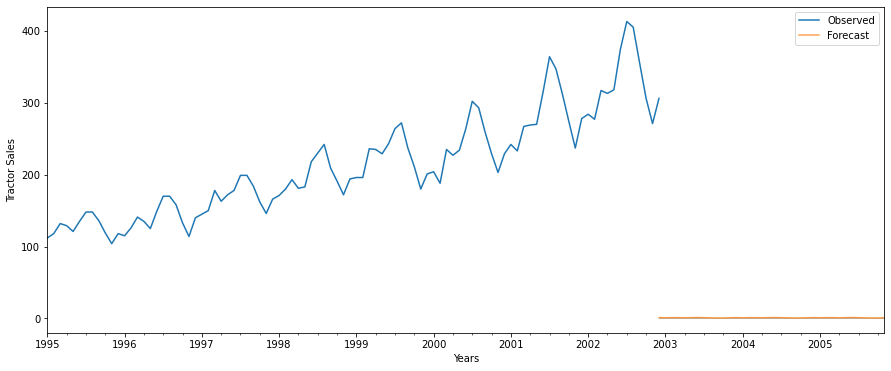

In [82]:
# plot the forecast along with the confidence band
axis = passengers_count.plot(label='Observed', figsize=(15, 6))
fc_all['forecast'].plot(ax=axis, label='Forecast', alpha=0.7)
#axis.fill_between(fc_all.index, fc_all['lower_ci_95'], fc_all['upper_ci_95'], color='k', alpha=.25)
axis.fill_between(fc_all.index, fc_all['lower_ci_99'], fc_all['upper_ci_99'], color='k', alpha=.25)
axis.set_xlabel('Years')
axis.set_ylabel('Tractor Sales')
plt.legend(loc='best')
plt.show()

#### Diagnostics:

1. Errors follows normality
2. Errors should not have auto correlation (ACF, no spikes beyond the limits)
3. Errors should not have any spikes (if the spikes are present, that particular time period, model didn't predict propoerly)

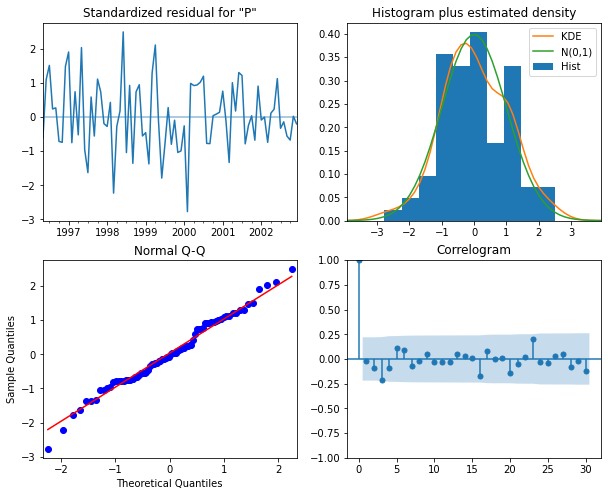

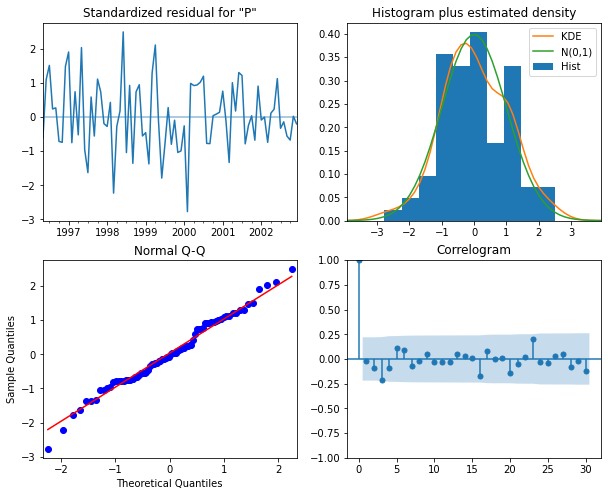

In [83]:
sarima_results.plot_diagnostics(lags=30,figsize=(10,8))

1. The KDE plot of the residuals on the top right is almost similar with the normal distribution.
2. The qq-plot on the bottom left shows that the ordered distribution of residuals (blue dots) follows the linear trend of the samples taken from a standard normal distribution with N(0, 1). Again, this is a strong indication that the residuals are normally distributed.
3. The residuals over time (top left plot) don't display any obvious seasonality and appear to be white noise. This is confirmed by the autocorrelation (i.e. correlogram) plot on the bottom right, which shows that the time series residuals have low correlation with lagged versions of itself.